# Lagged Cross Correlations

In [ ]:
#| default_exp lagged_ccorr

In [ ]:
#| hide

import plotly.io as pio

In [ ]:
#| hide
pio.renderers.default = "png"

In [ ]:
#| hide

from fhemb.piece import Piece
from fhemb.utils.factories import wfactory, pca_factory

DEBUG:fhemb.config.settings:Loading environment from /Users/radned/.config/fhemb/.env.paths
DEBUG:fhemb.config.settings:Loading environment from /Users/radned/.config/fhemb/.env.db


In [ ]:
#| export

dg0 = Piece(title='Don Giovanni', time_interval=(14200,15200), subjs=[(65,68)])

 [DEBUG] mixins.wrapper: wrapper of process_subjects called with subjs=[(65, 68)], args=() and kwargs={'title': 'Don Giovanni', 'time_interval': (14200, 15200)}
 [DEBUG] mixins.wrapper: Calling: get_piece_attribute_values with title=Don Giovanni and atributes=['number_of_subjects']
 [DEBUG] mixins.wrapper: to get subjects_int from 'number_of_subjects' record in performance_library
 [DEBUG] mixins.wrapper: Calling: __init__ with subjs=[65, 66, 67, 68] and args=() and kwargs={'title': 'Don Giovanni', 'time_interval': (14200, 15200)}
 [DEBUG] piece.__init__: Processed subjects: [65, 66, 67, 68]
 [DEBUG] piece.__init__: Compact numeric subjects: [(65, 68)]


 [INFO] piece._load_from_db: Loading face_t from the database tcamera as user tanalyst
 [INFO] piece._fetch_from_DB: Fetching data by query SELECT subj65, subj66, subj67, subj68 FROM dg.faceposition_t WHERE frame_number >= 14200 AND frame_number < 15200 ORDER BY frame_number
 from the database  tcamera as user tanalyst
/Users/radned/.pyenv/versions/p3.11.3.CEBRA/lib/python3.11/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning:

TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.

/Users/radned/.pyenv/versions/p3.11.3.CEBRA/lib/python3.11/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning:

TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.

 [DEBUG] piece.start: SSH tunnel established
 [DEBUG] dbms.__enter__: Dat

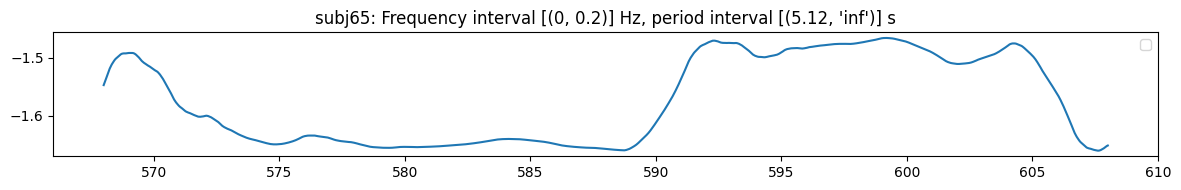

(<Figure size 1200x200 with 1 Axes>,
 [<Axes: title={'center': "subj65: Frequency interval [(0, 0.2)] Hz, period interval [(5.12, 'inf')] s"}>])

In [ ]:
#| eval: false

dg0.face_t.project(features=['skew'], subjs=[65], fbands=[0,1,2], wdfactory=wfactory('db4',8)).plot_signal(subjs=[65])

In [ ]:
#| export

pca2 = pca_factory(
    name='standard_kpca_5_sigmoid_0.07', 
    scaler='Standard', 
    pca='Kernel',
    scaler_kwargs=dict(with_std=True), 
    pca_kwargs=dict(n_components=5, kernel='sigmoid', gamma=0.07, fit_inverse_transform=True)
)

In [ ]:
#| hide

dg0.face_t.create_pca_embedding(factory=pca2)

 [INFO] piece._load_from_db: Loading face_t from the database tcamera as user tanalyst
 [INFO] piece._fetch_from_DB: Fetching data by query SELECT subj65, subj66, subj67, subj68 FROM dg.faceposition_t WHERE frame_number >= 14200 AND frame_number < 15200 ORDER BY frame_number
 from the database  tcamera as user tanalyst
 [DEBUG] piece.start: SSH tunnel established
 [DEBUG] dbms.__enter__: Database connection opened: True (conn.closed=0)
 [DEBUG] dbms.__enter__: Database cursor opened: True
 [INFO] dbms.data_query: Fetching time series of ['subj65', 'subj66', 'subj67', 'subj68']
 [DEBUG] dbms.__exit__: __exit__ called with exc_type=None, 
exc_val=None, 
exc_tb=None
 [DEBUG] dbms.__exit__: Cursor closed: True
 [DEBUG] dbms.__exit__: Transaction committed
 [DEBUG] dbms.__exit__: Connection closed: True (conn.closed = 1)
 [INFO] dbms.fetch_data_as_timeseries_dict: 1000 rows fetched successfully!
 [DEBUG] piece.stop: SSH tunnel closed
 [INFO] piece._fetch_from_DB: Fetching data by query SELE

(<fhemb.embedding.Embedding>,
 "StandardScaler(copy=True,with_mean=True,with_std=True) | KernelPCA(alpha=1.0,coef0=1,copy_X=True,degree=3,eigen_solver='auto',fit_inverse_transform=True,gamma=0.07,iterated_power='auto',kernel='sigmoid',kernel_params=None,max_iter=None,n_components=5,n_jobs=None,random_state=None,remove_zero_eig=False,tol=0)")

 [DEBUG] piece.project: Choosen embeddings: [('features_ts', {'embedding': <fhemb.embedding.Embedding object>, 'features': ['kurtosis', 'skew']})]
 [DEBUG] mixins.wrapper: Calling create_wdecomposition with stacklevel=2
 [DEBUG] mixins.wrapper: Processing features ['kurtosis', 'skew'], heatmap None, fvector None, args=(), and kwargs={'factory': <fhemb.utils.factories.ConcreteEmbFactory object>}
 [DEBUG] mixins.wrapper: Feature keywords detected, no preprocessing needed.
 [DEBUG] mixins.wrapper: Validating feature: [7, 6]
 [DEBUG] mixins.validate_grid: Vallidating grid: [7, 6] and maxsize: 9
 [DEBUG] mixins.validate_grid: Vallidated grid: [7, 6]
 [DEBUG] mixins.wrapper: valid_feature: [6, 7]
 [DEBUG] mixins.wrapper: valid_features=[(6, 7)]
 [DEBUG] embedding.create_wdecomposition: Calling create_wdecomposition for features=('skew', 'kurtosis')
 [DEBUG] tutils.create: Creating create_wdecomposition with args: ('skew', 'kurtosis') and kwargs: dict_keys(['factory', 'oembedding'])
 [DEBUG] 

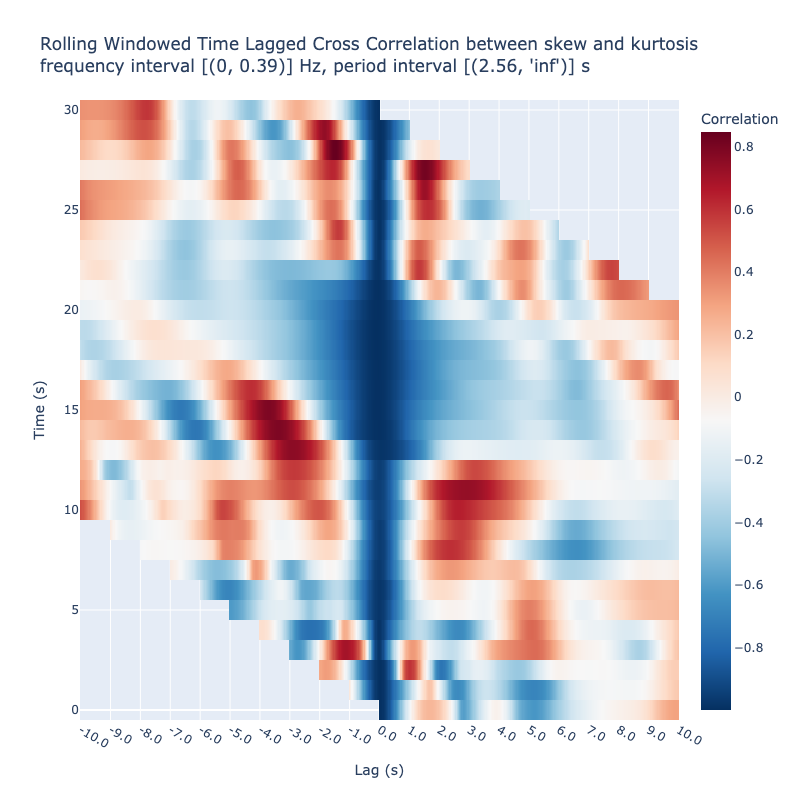

In [ ]:
#| eval: false

dg0.face_t.project(
    subjs=[65],
    features=['kurtosis', 'skew'],
    fbands=[0,1,2,3],
    wdfactory=wfactory('db4',8),
    pcfactory=pca2,
).plot_lagged_correlations(
    twin=250,
    step=25,
    max_lag=250,
    n_jobs=8
)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()